3. AdEx: the Adaptive Exponential Integrate-and-Fire model
Book chapters **in this model we try to observe model responses under different input currents and different parameters**

The Adaptive Exponential Integrate-and-Fire model is introduced in Chapter 6 Section 1.

Python classes

Use function **AdEx.simulate_AdEx_neuron() to run the model for different input currents and different parameters**. Get started by running the following script:


we plotted exisiting Adex module by calling

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 10


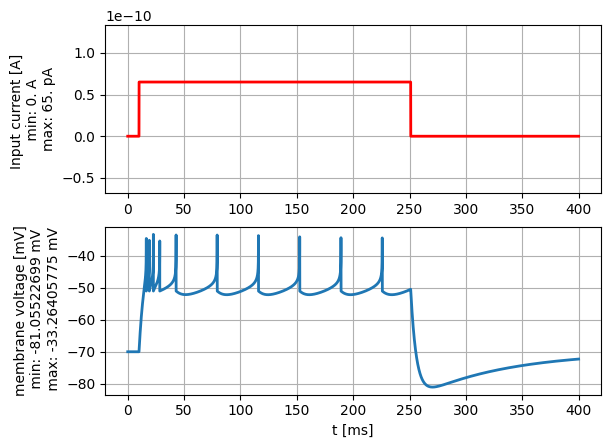

In [1]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
# AdEx.plot_adex_state(state_monitor)

3.1. Exercise: **Adaptation and firing patterns**
We have implemented an Exponential Integrate-and-Fire model with a single adaptation current w: 

τmdudt=−(u−urest)+ΔTexp(u−ϑrhΔT)−Rw+RI(t)

τwdwdt= a(u−urest)−w+bτw∑t(f)δ(t−t(f))

3.1.1. Question: Firing pattern
When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in Chapter 6.1.
Call the function AdEx.simulate_AdEx_neuron() with different parameters and try to create adapting, bursting and irregular firing patterns. Table 6.1 in Chapter 6.2 provides a starting point for your explorations.
In order to better understand the dynamics, it is useful to observe the joint evolution of u and w in a phase diagram. Use the function AdEx.plot_adex_state() to get more insights. Fig. 6.3 in Chapter 6.2 shows a few trajectories in the phase diagram.

a=0*b2.nS instead of a=0.

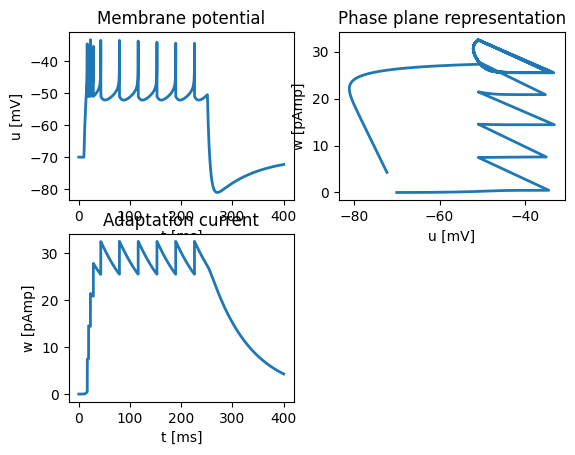

In [2]:
# Optionally, plot the AdEx state variables
AdEx.plot_adex_state(state_monitor)

3.2. Exercise: **phase plane and nullclines**
First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.

Plot or sketch the u and w nullclines of the AdEx model (I(t) = 0).
How do the nullclines change with respect to a?
How do the nullclines change if a constant current I(t) = c is applied?
What is the interpretation of parameter b?
How do flow arrows change as tau_w gets bigger?



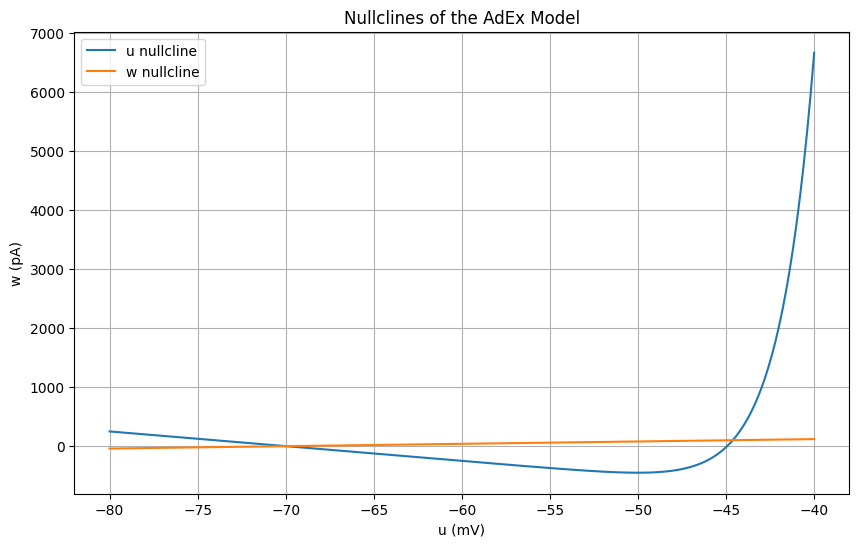

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2

# Define parameters
u_rest = -70 * b2.mV
Delta_T = 2 * b2.mV
vartheta_rh = -50 * b2.mV
R = 40 * b2.Mohm
a = 4 * b2.nS
I = 0 * b2.pA

u = np.linspace(-80, -40, 400) * b2.mV

# Calculate nullclines
w_u_nullcline = (-(u - u_rest) + Delta_T * np.exp((u - vartheta_rh) / Delta_T)) / R
w_w_nullcline = a * (u - u_rest)

# Plot nullclines
plt.figure(figsize=(10, 6))
plt.plot(u / b2.mV, w_u_nullcline / b2.pA, label='u nullcline')
plt.plot(u / b2.mV, w_w_nullcline / b2.pA, label='w nullcline')
plt.xlabel('u (mV)')
plt.ylabel('w (pA)')
plt.title('Nullclines of the AdEx Model')
plt.legend()
plt.grid(True)
plt.show()


3.2.1. Question:
**Can you predict what would be the firing pattern if a is small (in the order of 0.01 nS) ?** To do so, consider the following 2 conditions:

A large jump b and a large time scale tau_w.
A small jump b and a small time scale tau_w.
Try to simulate the above conditions, to see if your predictions were true.

Number of spikes (large b, large tau_w): 1


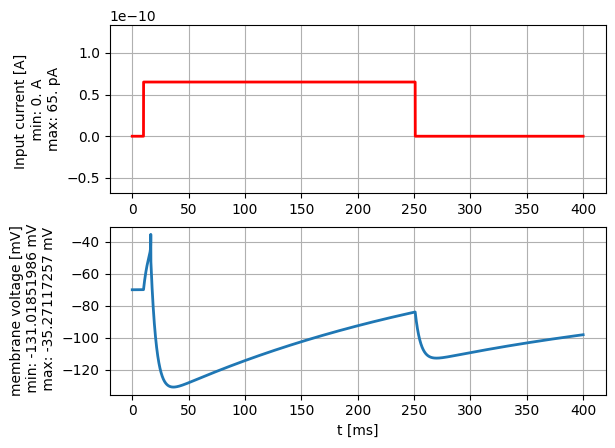

In [7]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# Define the step current
current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)

# Parameters for condition 1: Large jump b and large tau_w
params_large_b_large_tau_w = {
    'a': 0.01 * b2.nS,
    'b': 0.2 * b2.nA,
    'tau_w': 300 * b2.ms
}

# Simulate the AdEx neuron for condition 1
state_monitor_large_b_large_tau_w, spike_monitor_large_b_large_tau_w = AdEx.simulate_AdEx_neuron(
    I_stim=current, simulation_time=400 * b2.ms, **params_large_b_large_tau_w)

# Plot the voltage and current traces for condition 1
plot_tools.plot_voltage_and_current_traces(state_monitor_large_b_large_tau_w, current)
print("Number of spikes (large b, large tau_w): {}".format(spike_monitor_large_b_large_tau_w.count[0]))





Number of spikes (small b, small tau_w): 30


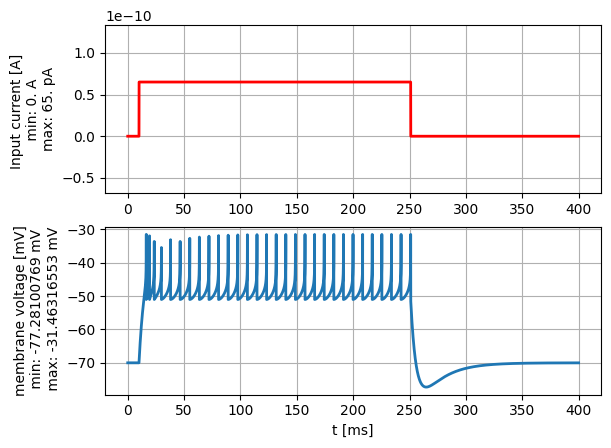

In [8]:
# Parameters for condition 2: Small jump b and small tau_w
params_small_b_small_tau_w = {
    'a': 0.01 * b2.nS,
    'b': 0.01 * b2.nA,
    'tau_w': 20 * b2.ms
}

# Simulate the AdEx neuron for condition 2
state_monitor_small_b_small_tau_w, spike_monitor_small_b_small_tau_w = AdEx.simulate_AdEx_neuron(
    I_stim=current, simulation_time=400 * b2.ms, **params_small_b_small_tau_w)

# Plot the voltage and current traces for condition 2
plot_tools.plot_voltage_and_current_traces(state_monitor_small_b_small_tau_w, current)
print("Number of spikes (small b, small tau_w): {}".format(spike_monitor_small_b_small_tau_w.count[0]))


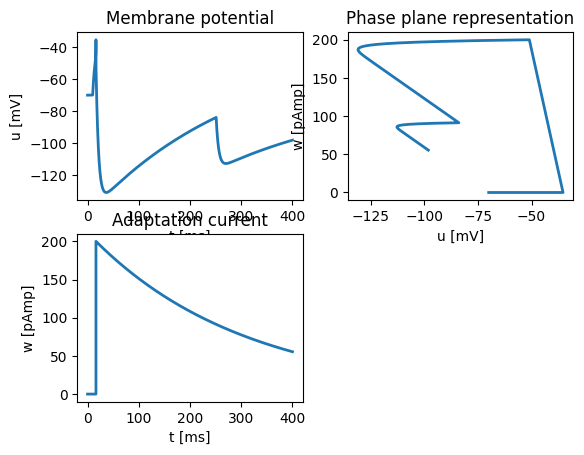

In [9]:
AdEx.plot_adex_state(state_monitor_large_b_large_tau_w)

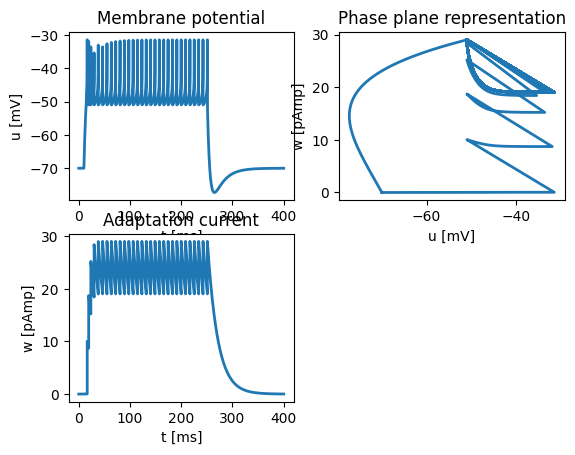

In [10]:
AdEx.plot_adex_state(state_monitor_small_b_small_tau_w)

3.2.2. Question:
To learn more about the variety of patterns the relatively simple neuron model can reproduce, have a look the following publication: Naud, R., Marcille, N., Clopath, C., Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological cybernetics, 99(4-5), 335-347.

